In [1]:
#preprocessing

In [2]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [61]:
#dataset is cars and their emissions
#https://data.world/amercader/car-fuel-emissions-2000-2013/

#read in the csv
cars = pd.read_csv("data.csv", low_memory=False)
cars.head(10)

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
5,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,Ti,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
6,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
7,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
8,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,2.0 Selespeed,2,NaN,SAT5,Automatic,1970.0,...,NaN,NaN,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN
9,DatapartC_july2000.csv,2000,Alfa Romeo,156 Range,2.0 Twin Spark 16v,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN


In [62]:
cars.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

In [5]:
cars.shape

(45511, 31)

In [6]:
#drop file because it isnt useful for analysis
cars = cars.drop(['file'], axis=1)

In [7]:
#counting missing value percentage for each column

percent_missing = cars.isna().sum()/ len(cars) *100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)


,percent_missing
first_year_6_months,96.882072
standard_6_months,93.570785
first_year_12_months,92.272198
standard_12_months,92.272198
thc_nox_emissions,88.068819
date_of_change,86.346158
tax_band,82.779987
fuel_cost_6000_miles,73.193294
particulates_emissions,67.478192
thc_emissions,49.045286


In [8]:
cars = cars[['year', 'manufacturer', 'co2', 'urban_metric', 'extra_urban_metric', 'combined_metric', 'model', 'fuel_type']]

cars = cars.fillna(0)
cars

,year,manufacturer,co2,urban_metric,extra_urban_metric,combined_metric,model,fuel_type
0,2000,Alfa Romeo,195,11.1,6.5,8.2,145 Range,Petrol
1,2000,Alfa Romeo,200,11.5,6.6,8.4,145 Range,Petrol
2,2000,Alfa Romeo,210,12.4,6.6,8.8,145 Range,Petrol
3,2000,Alfa Romeo,195,11.3,6.6,8.3,146 Range,Petrol
4,2000,Alfa Romeo,200,11.5,6.6,8.4,146 Range,Petrol
...,...,...,...,...,...,...,...,...
45506,2013,Volkswagen,122,5.7,4.1,4.7,New Golf 2013,Diesel
45507,2013,Volkswagen,139,7.5,5.1,6.0,New Golf 2013,Petrol
45508,2013,Volkswagen,139,7.5,5.1,6.0,New Golf 2013,Petrol
45509,2013,Volkswagen,148,8.1,5.3,6.4,New Golf 2013,Petrol


In [9]:
#analysis

In [46]:
#summing emissions by manufacturer for use in pareto chart
manufacturers_emissions = cars.loc[:, ['manufacturer', 'co2']]
summed_emissions = manufacturers_emissions.groupby(['manufacturer']).sum()
summed_emissions = summed_emissions.sort_values(by='co2', ascending=False)
summed_emissions.head(10)

,co2
manufacturer,
Mercedes-Benz,1178426
Vauxhall,722466
Volkswagen,659921
Audi,573583
BMW,558210
Ford,496182
Volvo,367334
Renault,320410
Peugeot,273557


In [51]:
# Add cumulative percentage column
summed_emissions["cum_percentage"] = round(summed_emissions["co2"].cumsum()/summed_emissions["co2"].sum()*100,2)
summed_emissions.head(20)

,co2,cum_percentage
manufacturer,,
Mercedes-Benz,1178426,13.66
Vauxhall,722466,22.03
Volkswagen,659921,29.68
Audi,573583,36.33
BMW,558210,42.80
Ford,496182,48.55
Volvo,367334,52.80
Renault,320410,56.52
Peugeot,273557,59.69


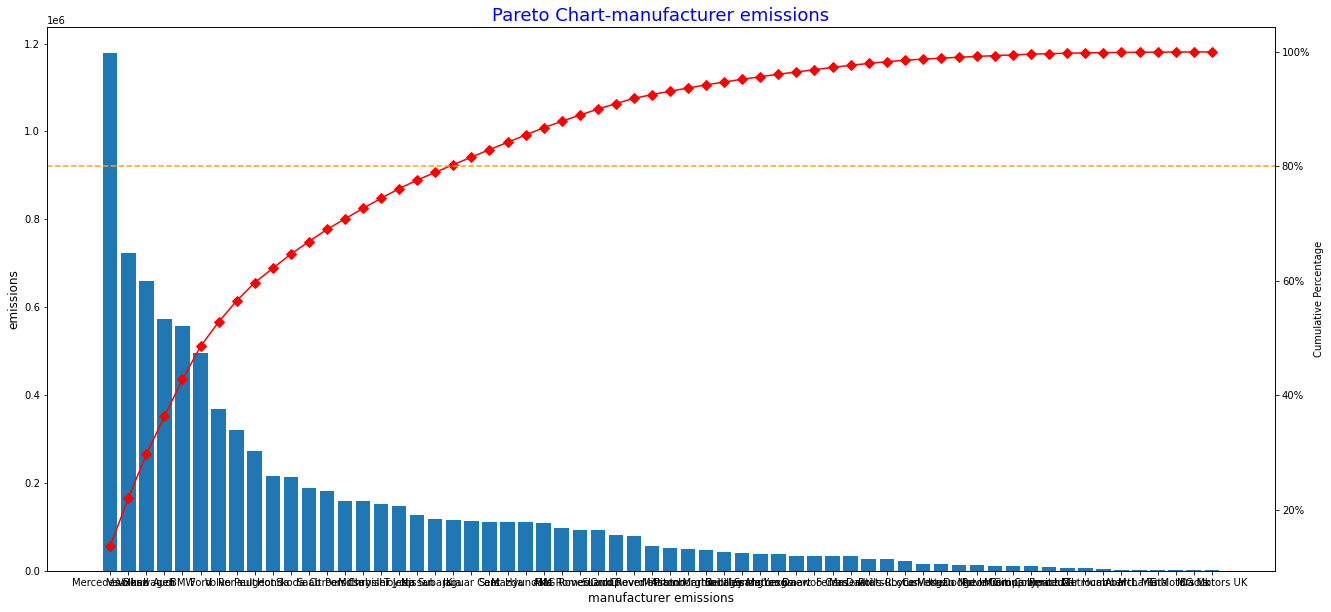

In [12]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(summed_emissions.index, summed_emissions["co2"])
ax.set_title("Pareto Chart-manufacturer emissions", fontsize=18, color="b")
ax.set_xlabel("manufacturer emissions", fontsize=12, color="black")
ax.set_ylabel("emissions", fontsize=12, color="black");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(summed_emissions.index, summed_emissions["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");


In [13]:
summed_emissions.drop(summed_emissions.tail(30).index,inplace=True)
summed_emissions

,co2,cum_percentage
manufacturer,,
Mercedes-Benz,1178426,13.66
Vauxhall,722466,22.03
Volkswagen,659921,29.68
Audi,573583,36.33
BMW,558210,42.80
Ford,496182,48.55
Volvo,367334,52.80
Renault,320410,56.52
Peugeot,273557,59.69


In [14]:
summed_emissions["cum_percentage"] = round(summed_emissions["co2"].cumsum()/summed_emissions["co2"].sum()*100,2)
summed_emissions

,co2,cum_percentage
manufacturer,,
Mercedes-Benz,1178426,14.66
Vauxhall,722466,23.65
Volkswagen,659921,31.87
Audi,573583,39.00
BMW,558210,45.95
Ford,496182,52.13
Volvo,367334,56.70
Renault,320410,60.68
Peugeot,273557,64.09


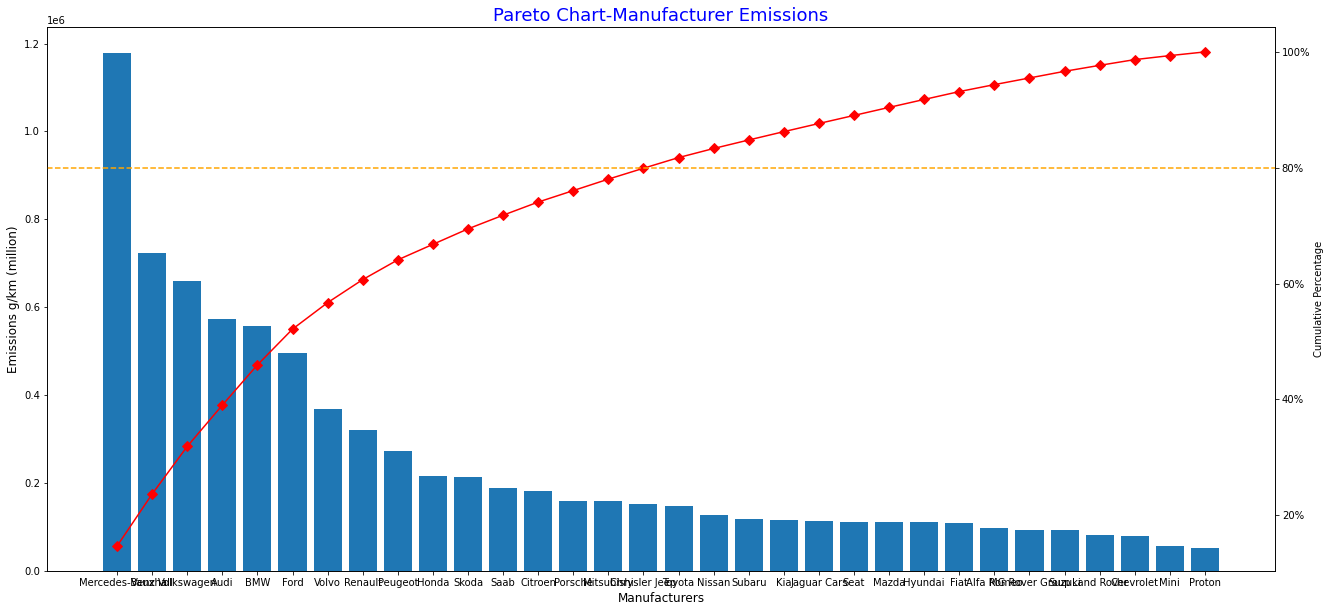

In [15]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(summed_emissions.index, summed_emissions["co2"])
ax.set_title("Pareto Chart-Manufacturer Emissions", fontsize=18, color="b")
ax.set_xlabel("Manufacturers", fontsize=12, color="black")
ax.set_ylabel("Emissions g/km (million)", fontsize=12, color="black");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(summed_emissions.index, summed_emissions["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

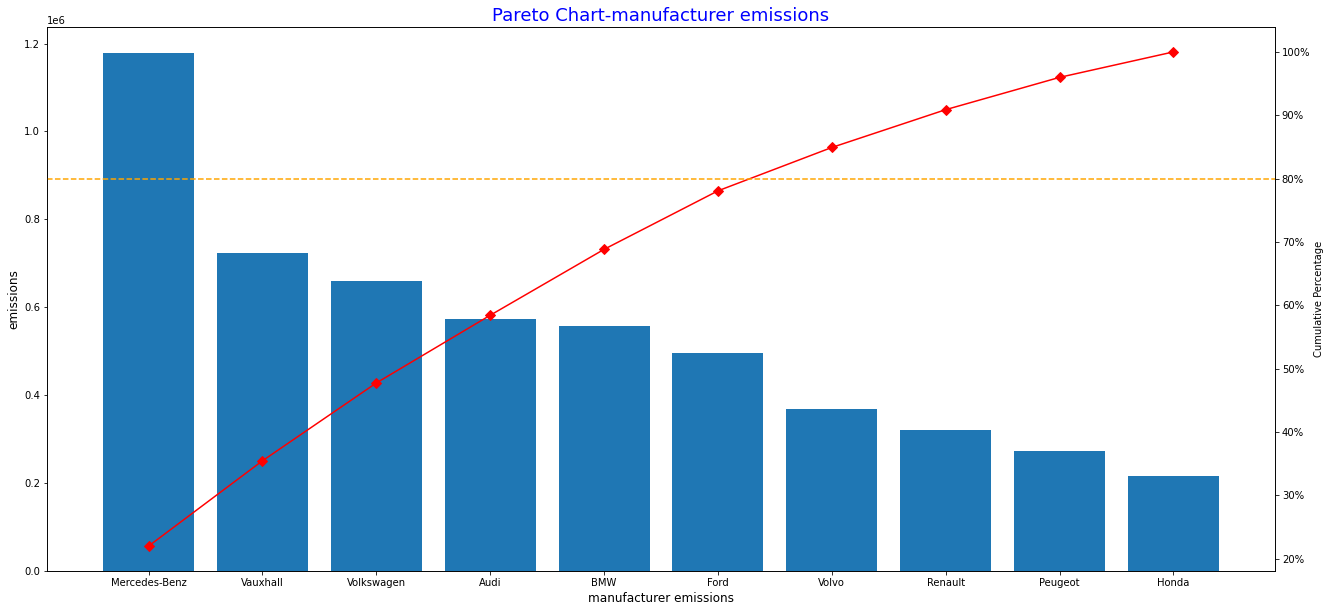

In [16]:
summed_emissions.drop(summed_emissions.tail(22).index,inplace=True)
summed_emissions["cum_percentage"] = round(summed_emissions["co2"].cumsum()/summed_emissions["co2"].sum()*100,2)

# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(summed_emissions.index, summed_emissions["co2"])
ax.set_title("Pareto Chart-manufacturer emissions", fontsize=18, color="b")
ax.set_xlabel("manufacturer emissions", fontsize=12, color="black")
ax.set_ylabel("emissions", fontsize=12, color="black");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(summed_emissions.index, summed_emissions["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

In [17]:
#pie chart showing who has the most vehicles in the data

numCars = manufacturers_emissions.drop(['co2'], axis=1)
numCars = numCars['manufacturer'].value_counts().to_frame()
numCars.drop(numCars.tail(52).index,inplace=True)

<AxesSubplot:ylabel='manufacturer'>

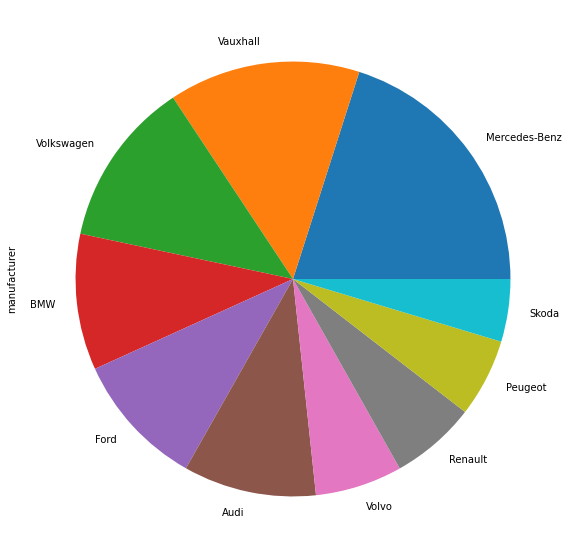

In [18]:
plot = numCars.plot.pie(y='manufacturer', figsize=(10, 10))
plot.get_legend().remove()
plot

In [19]:
#who has the cars that produces the most emissions
maxEmissions = cars.loc[:, ['manufacturer', 'co2', 'model']]
maxEmissions = maxEmissions.drop_duplicates(subset=['model'], keep='first')
maxEmissions.nlargest(10, ['co2'])

,manufacturer,co2,model
695,Lamborghini,575,Diablo Model Year 1997
698,Lamborghini,575,Diablo Model Year 1998/1999
13348,Maserati,545,MC12
702,Lamborghini,539,Diablo Model Year 2000
2561,Lamborghini,520,Diablo Model Year 2001
4619,Lamborghini,520,Diablo Model Year 2002
4620,Lamborghini,520,Diablo Model Year 2003
6957,Lamborghini,500,Murcielgo Model Year 2002/3
6958,Lamborghini,500,Murcielgo Model Year 2004
17062,Lamborghini,500,Murcielago Model Year 2004


In [33]:
manufacturers_emissions = cars.loc[:, ['manufacturer', 'co2']]
avg_emissions = manufacturers_emissions.groupby(['manufacturer']).mean()
avg_emissions = avg_emissions.sort_values(by='co2', ascending=False)
avg_emissions = avg_emissions.reset_index()

avg_emissions.drop(avg_emissions.tail(30).index,inplace=True)

avg_emissions

,manufacturer,co2
0,Lamborghini,476.213592
1,Bentley Motors,419.500000
2,Ferrari,417.456790
3,Rolls-Royce,393.731343
4,Maserati,382.206897
5,Aston Martin Lagonda,371.619048
6,Hummer,336.500000
7,Corvette,316.096154
8,Isuzu,308.423077
9,McLaren,279.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

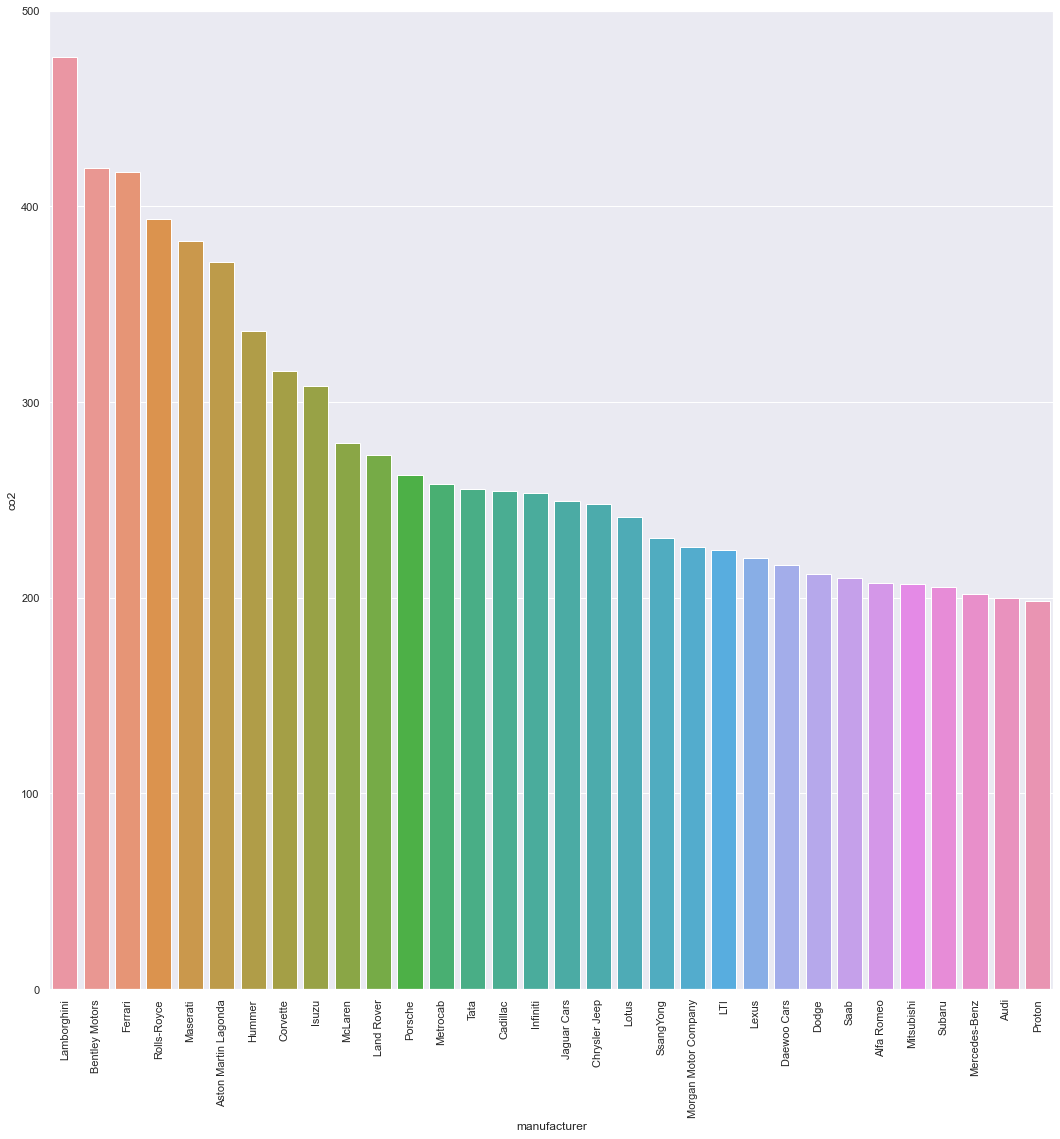

In [34]:
sns.set(rc={'figure.figsize':(18, 18)})
avgem = sns.barplot(x="manufacturer", y="co2", data=avg_emissions)
plt.setp(avgem.get_xticklabels(), rotation=90)
plt.plot

In [63]:

carYears = cars.loc[:, ['year', 'co2']]

yearEmissions = carYears.groupby(['year']).sum()
yearEmissions = yearEmissions.reset_index()
yearEmissions

,year,co2
0,2000,375346
1,2001,459372
2,2002,457444
3,2003,631680
4,2004,649745
5,2005,726535
6,2006,705207
7,2007,598146
8,2008,645990
9,2009,726281


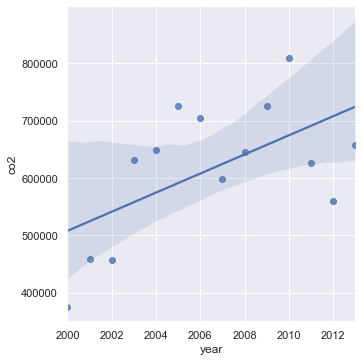

In [23]:
sns.lmplot(x='year',y='co2',data=yearEmissions,fit_reg=True) 

In [24]:
#plot average emission per year scatterplot
carYears = cars.loc[:, ['year', 'co2']]

avgYearEmissions = carYears.groupby(['year']).mean()
avgYearEmissions = avgYearEmissions.reset_index()
avgYearEmissions 

,year,co2
0,2000,216.088659
1,2001,213.860335
2,2002,214.560976
3,2003,205.290868
4,2004,207.123047
5,2005,197.642818
6,2006,200.799260
7,2007,201.463793
8,2008,196.409243
9,2009,189.431664


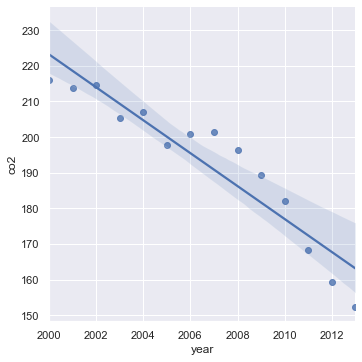

In [25]:
sns.lmplot(x='year',y='co2',data=avgYearEmissions,fit_reg=True) 

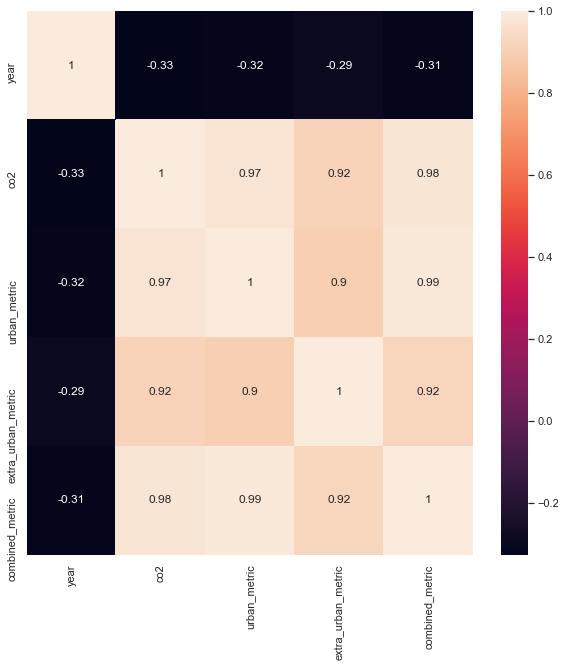

In [55]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(cars.corr(), annot = True)
plt.show()
#this shows that we want something low in combined_metric if we want a car with low emissions

In [56]:
bestCars = cars
bestCars = bestCars.sort_values(['combined_metric'], ascending=True)
bestCars.head(10)

,year,manufacturer,co2,urban_metric,extra_urban_metric,combined_metric,model,fuel_type
44000,2013,Smart,0,0.0,0.0,0.0,"fortwo coupé, Model Year 2013",Electricity
42064,2013,Citroen,0,0.0,0.0,0.0,C-Zero,Electricity
43987,2013,Smart,0,0.0,0.0,0.0,"fortwo cabrio, Model Year 2013",Electricity
43718,2013,Renault,0,0.0,0.0,0.0,Zoe,Electricity
43661,2013,Renault,0,0.0,0.0,0.0,Fluence Z.E.,Electricity
45493,2013,Mitsubishi,0,0.0,0.0,0.0,i-MiEV,Electricity
45494,2013,Nissan,0,0.0,0.0,0.0,Leaf,Electricity
41951,2013,Chevrolet,27,0.0,0.0,1.2,Volt,Electricity/Petrol
44210,2013,Vauxhall,27,0.0,0.0,1.2,"Ampera, Model Year 2012",Electricity/Petrol
44209,2013,Vauxhall,27,0.0,0.0,1.2,"Ampera, Model Year 2012",Electricity/Petrol


In [57]:
#remove all fuel types but petrol for comparison
bestCars = bestCars.loc[cars['fuel_type'] == 'Petrol']
#lots of repeat cars so i will remove any repeat models
bestCars= bestCars.drop_duplicates(subset=['model'], keep='first')
bestCars.head(10)


,year,manufacturer,co2,urban_metric,extra_urban_metric,combined_metric,model,fuel_type
2448,2001,Honda,80,4.1,3.0,3.4,Insight (2001 YM),Petrol
599,2000,Honda,80,4.1,3.0,3.4,Insight (2000 YM),Petrol
6853,2003,Honda,80,4.1,3.0,3.4,Insight,Petrol
42143,2013,Fiat,90,4.4,3.6,3.9,500 and 500C,Petrol
38355,2012,Chrysler Jeep,97,4.9,3.7,4.1,Chrysler Ypsilon MY2012,Petrol
43366,2013,Nissan,95,5.0,3.6,4.1,Micra,Petrol
43322,2013,Mitsubishi,96,4.8,3.7,4.1,"Mirage, 2013",Petrol
43797,2013,Seat,96,5.0,3.6,4.1,Mii,Petrol
42169,2013,Fiat,95,4.8,3.7,4.1,New Panda,Petrol
40099,2012,Skoda,96,5.0,3.6,4.1,Citigo,Petrol
